**IMPORTS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**LOAD DATA**

In [2]:
neo = pd.read_csv('/content/neo.csv')
neo

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


**DATA EXPLORATION**

In [3]:
neo.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
neo.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [5]:
neo.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [6]:
neo.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [7]:
neo.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [8]:
neo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


**DATA CLEANING**

In [9]:
neo.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [10]:
neo.duplicated().sum()

0

**DATA EXPLORATION**

In [11]:
neo['hazardous'].unique()

array([False,  True])

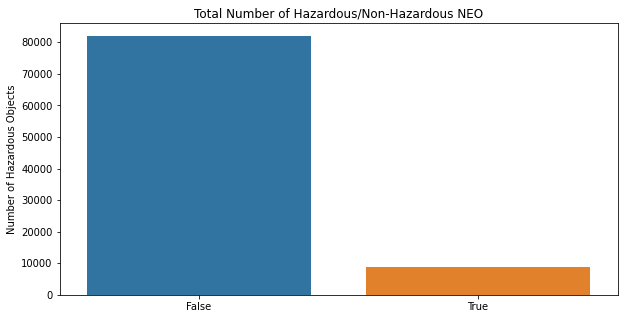

In [12]:
plt.figure(figsize=(10, 5))
plt.title("Total Number of Hazardous/Non-Hazardous NEO")

sns.barplot(x=neo['hazardous'].unique(),
            y=neo['hazardous'].value_counts())

plt.ylabel("Number of Hazardous Objects")
plt.show()

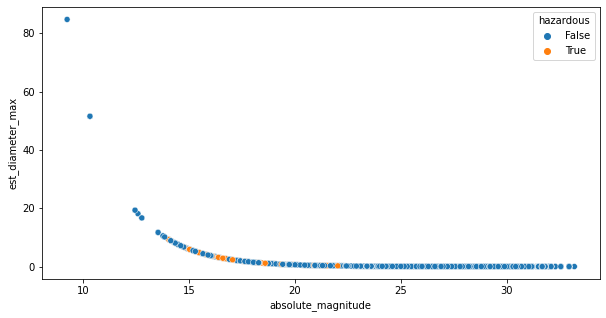

In [13]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=neo['absolute_magnitude'],
                y=neo['est_diameter_max'],
                hue=neo['hazardous'],
                data=neo)

plt.show()

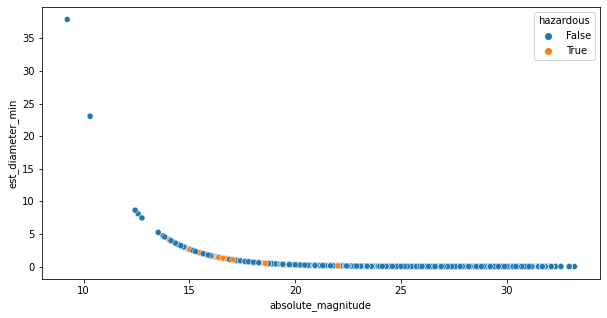

In [14]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='absolute_magnitude',
                y='est_diameter_min',
                hue='hazardous',
                data=neo)

plt.show()

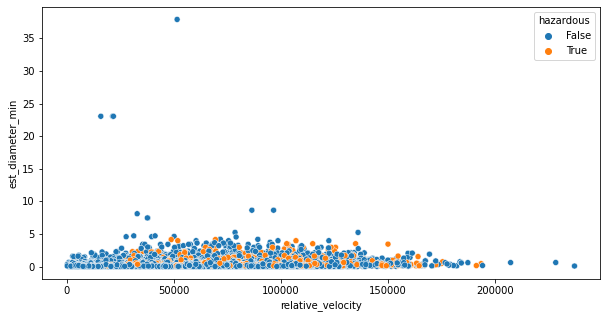

In [15]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='relative_velocity',
                y='est_diameter_min',
                hue='hazardous',
                data=neo)

plt.show()

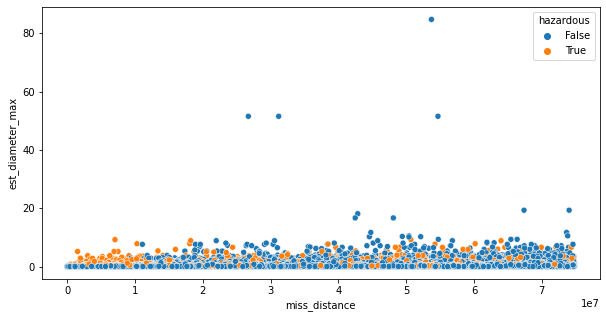

In [16]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='miss_distance',
                y='est_diameter_max',
                hue='hazardous',
                data=neo)

plt.show()

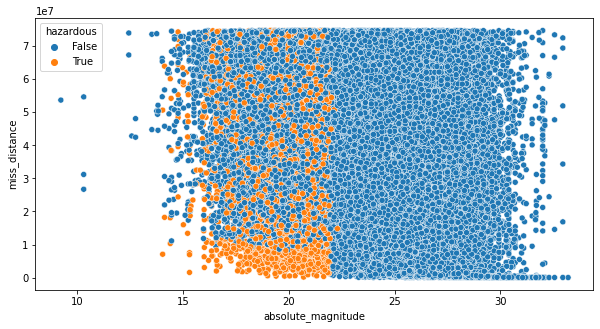

In [17]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='absolute_magnitude',
                y='miss_distance',
                hue='hazardous',
                data=neo)

plt.show()
# here we observe that objects with a smaller miss_distance and an absolute magnitude below aprox. 23 are more likely to be hazardous

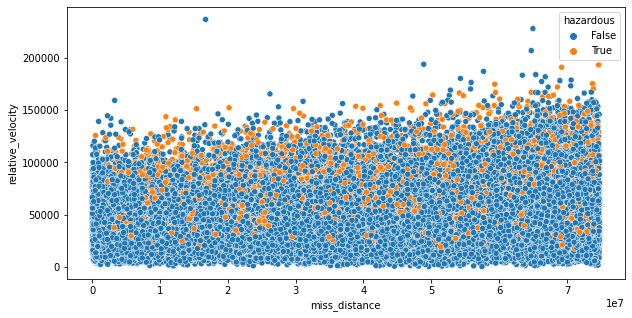

In [18]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='miss_distance',
                y='relative_velocity',
                hue='hazardous',
                data=neo)

plt.show()

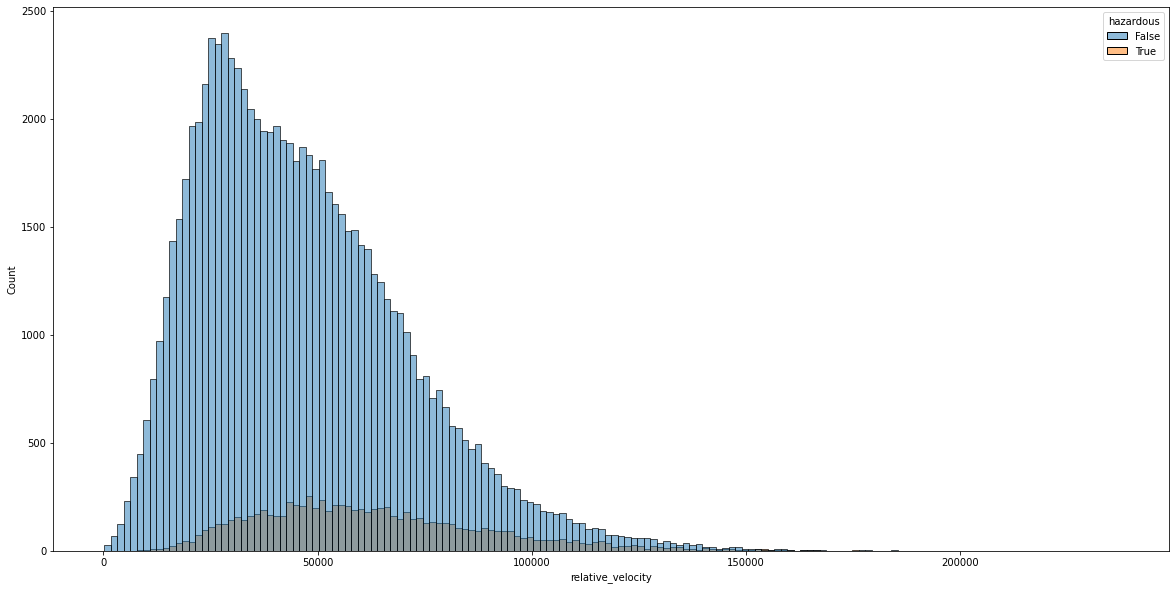

In [19]:
plt.figure(figsize=(20, 10))

sns.histplot(data=neo,
             x='relative_velocity',
             hue='hazardous')

plt.show()

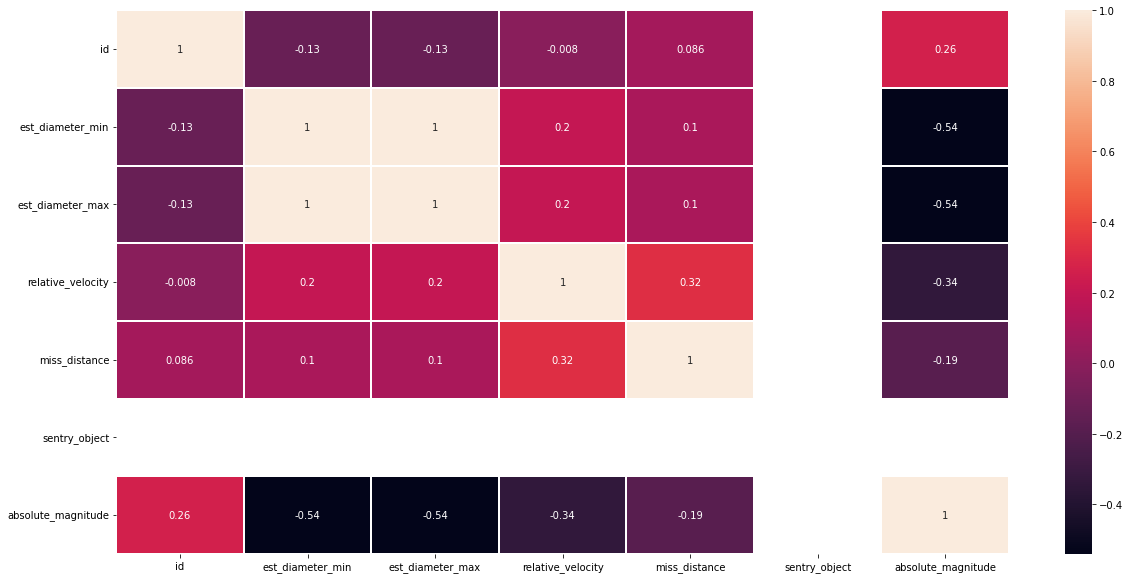

In [20]:
plt.figure(figsize=(20, 10))

sns.heatmap(neo.corr(),
            annot=True,
            linewidths=1)

plt.show()

**GET VALUES FOR KEYBOARD INPUT**

In [21]:
nr_test_values = 10

test_values = neo.sample(nr_test_values)
test_values

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
11252,2159857,159857 (2004 LJ1),2.140696,4.786742,54866.793673,5.531961e+07,Earth,False,15.47,True
9768,3412755,(2008 KV2),0.152249,0.340440,40939.431066,1.135218e+07,Earth,False,21.21,True
45521,3766076,(2016 YY),0.022108,0.049436,57573.625372,5.770899e+06,Earth,False,25.40,False
22544,3838078,(2019 BE5),0.025384,0.056760,58367.776335,1.150672e+07,Earth,False,25.10,False
49896,3799753,(2018 DD2),0.008801,0.019681,12552.910282,4.172762e+07,Earth,False,27.40,False
15846,3678611,(2014 OA339),0.036691,0.082043,22178.241630,5.986336e+07,Earth,False,24.30,False
7601,3986763,(2020 BL1),0.017561,0.039268,28473.502967,1.577409e+07,Earth,False,25.90,False
21659,3735598,(2015 WZ12),0.014607,0.032662,38536.935094,1.172919e+07,Earth,False,26.30,False
33050,3552770,(2010 XU),0.023150,0.051765,26611.872082,5.946012e+06,Earth,False,25.30,False
6992,3458579,(2009 HU44),0.080270,0.179490,50424.197301,4.225488e+07,Earth,False,22.60,False


In [22]:
test_values_X = test_values.drop(["hazardous", "sentry_object", "orbiting_body", "id", "name"], axis=1)
test_values_X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
11252,2.140696,4.786742,54866.793673,5.531961e+07,15.47
9768,0.152249,0.340440,40939.431066,1.135218e+07,21.21
45521,0.022108,0.049436,57573.625372,5.770899e+06,25.40
22544,0.025384,0.056760,58367.776335,1.150672e+07,25.10
49896,0.008801,0.019681,12552.910282,4.172762e+07,27.40
15846,0.036691,0.082043,22178.241630,5.986336e+07,24.30
7601,0.017561,0.039268,28473.502967,1.577409e+07,25.90
21659,0.014607,0.032662,38536.935094,1.172919e+07,26.30
33050,0.023150,0.051765,26611.872082,5.946012e+06,25.30
6992,0.080270,0.179490,50424.197301,4.225488e+07,22.60


In [23]:
test_values_y = test_values["hazardous"]
test_values_y

11252     True
9768      True
45521    False
22544    False
49896    False
15846    False
7601     False
21659    False
33050    False
6992     False
Name: hazardous, dtype: object

In [24]:
# drop rows that will be used for test
for index in test_values.index:
  neo = neo.drop(index)

**GET TRAIN AND TEST DATA**

In [25]:
features = neo.drop(["hazardous", "sentry_object", "orbiting_body", "id", "name"], axis=1)
target = neo["hazardous"]

X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

**TRAIN & PREDICT**

In [26]:
clf = DecisionTreeClassifier(max_depth = 50)
clf = clf.fit(X_train, y_train)

In [27]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
predictions = clf.predict(X_test)
predictions

array(['True', 'False', 'False', ..., 'False', 'False', 'True'],
      dtype=object)

In [29]:
accuracy_score(y_test, predictions)

0.8746573635684027

**SINGLE VALUE TEST**

In [30]:
test_values_X.iloc[2]

est_diameter_min      2.210828e-02
est_diameter_max      4.943562e-02
relative_velocity     5.757363e+04
miss_distance         5.770899e+06
absolute_magnitude    2.540000e+01
Name: 45521, dtype: float64

In [31]:
test_values_y.iloc[2]

'False'

In [32]:
# predict on selected values for test
test_predictions = clf.predict([test_values_X.iloc[2]])
test_predictions

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['False'], dtype=object)

In [33]:
accuracy_score([test_values_y.iloc[2]], test_predictions)

1.0

**MULTIPLE VALUES TEST**

In [34]:
# predict on selected values for test
test_predictions = clf.predict(test_values_X)
test_predictions

array(['False', 'True', 'False', 'False', 'False', 'False', 'False',
       'False', 'False', 'False'], dtype=object)

In [35]:
accuracy_score(test_values_y, test_predictions)

0.9

**K-NEAREST NEIGHBOURS**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
knn.score(X_test,y_test)

0.8646399202591577

In [20]:
# In terms of accuracy, we can observe that KNN and Decision Tree are very similar

**EXPORT MODEL**

In [38]:
from joblib import dump, load

dump(clf, 'Neo_Classifier.joblib')
clf = load('Neo_Classifier.joblib')

**DEBUGGING**

In [42]:
string = '1232.540000e+01'

fl = float(string)

fl

12325.4

In [44]:
data = [0, 'name', 0.02210828, 0.04943562, '57573.63', 5770899, 'Earth', False, 12325.4]

input_df = pd.DataFrame([data], columns=['id', 'name', 'est_diameter_min', 'est_diameter_max',
                                           'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
                                           'absolute_magnitude'])

input_df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude
0,0,name,0.022108,0.049436,57573.63,5770899,Earth,False,12325.4
